In [291]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [292]:
df=pd.read_csv('wine_quality.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [293]:
pd.set_option('display.max_rows',None)

In [294]:
df['quality']

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
30      5
31      6
32      5
33      6
34      5
35      6
36      6
37      7
38      4
39      5
40      5
41      4
42      6
43      5
44      5
45      4
46      5
47      5
48      5
49      5
50      5
51      6
52      6
53      5
54      6
55      5
56      5
57      5
58      5
59      6
60      5
61      5
62      7
63      5
64      5
65      5
66      5
67      5
68      5
69      6
70      6
71      5
72      5
73      4
74      5
75      5
76      5
77      6
78      5
79      4
80      5
81      5
82      5
83      5
84      6
85      5
86      6
87      5
88      5
89      5
90      5
91      6
92      5
93      5
94      4
95      6
96      5
97      5
98      5
99      6


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [298]:
df.shape

(1599, 12)

In [299]:
#Statistical summary
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [300]:
#checking the null values in dataset
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

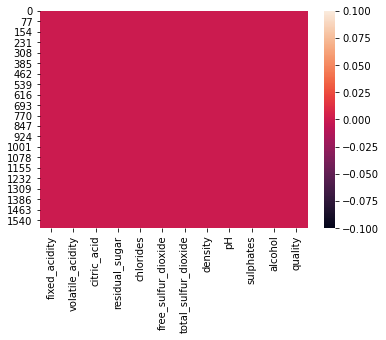

In [301]:
sns.heatmap(df.isnull())

There is no null values in the dataset

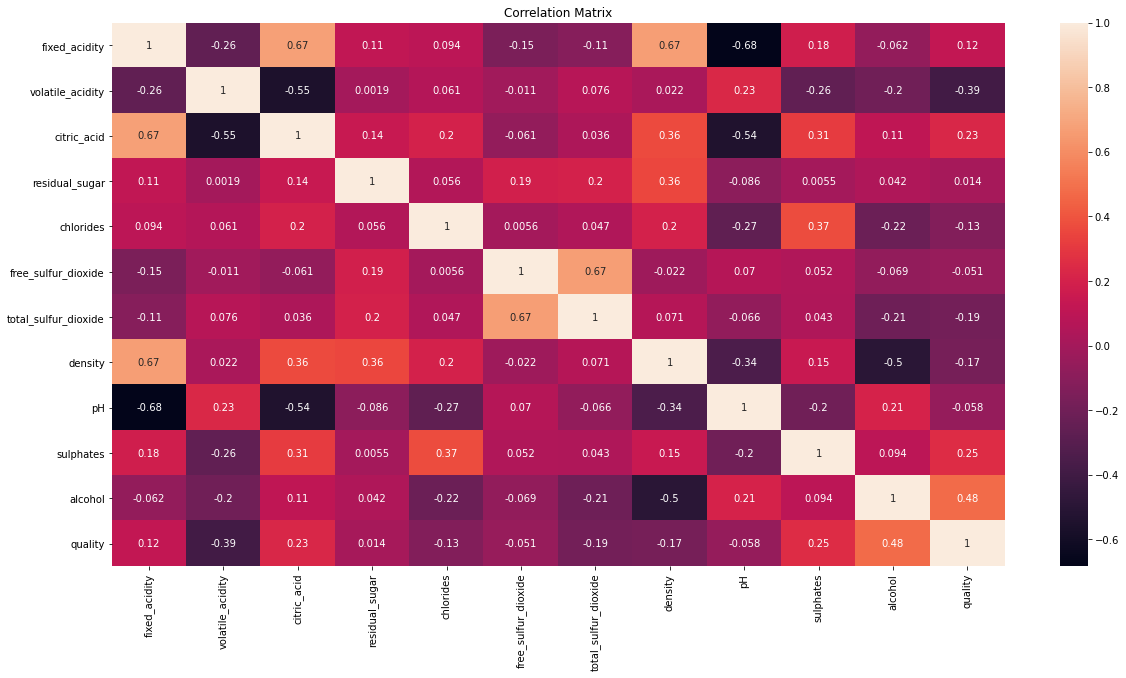

In [302]:
#Checking correlation (example of multivariate analysis)
corr_mat=df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix,volatile_acidity column is negatively correlated with the target variable(quality).
Alcohol and sulphates are somewhat positively correlated with the target variable(quality).

In [303]:
corr_matrix=df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

In [304]:
#sns.pairplot(df)
#plt.show()

In [305]:
#Splitting the independent and target variables in x and y
x=df.drop('quality',axis=1)
y=df['quality']

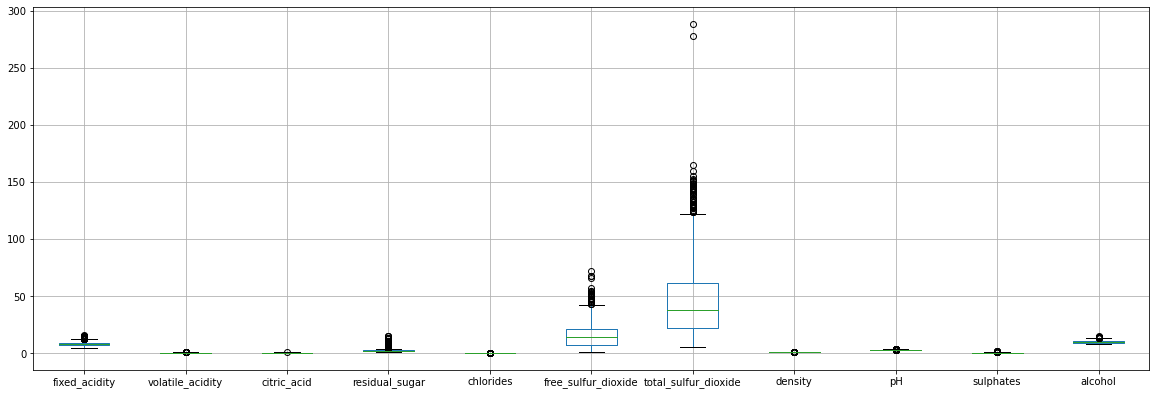

In [306]:
#Checking outliers
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

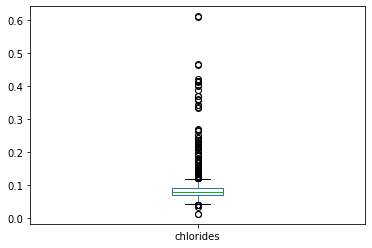

In [307]:
df['chlorides'].plot.box()

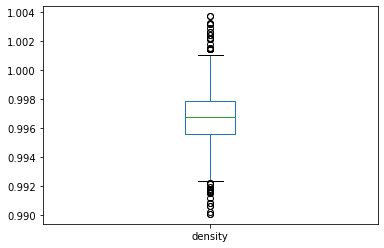

In [308]:
df['density'].plot.box()

In [309]:
#Outliers removal
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [310]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [311]:
z[1589][3]

3.732701384742145

In [312]:
z[1574][3]

8.060516762374213

In [313]:
print('shape before removing the outliers:',df.shape)
dfnew=df[(z<3).all(axis=1)]
print('shape after removing the outliers:',dfnew.shape)

shape before removing the outliers: (1599, 12)
shape after removing the outliers: (1451, 12)


In [314]:
#%data loss calculation
loss_percent=(1599-1451)/1599*100
print(loss_percent)

9.255784865540964


In [315]:
#Checking skewness
x.skew()

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.318337
residual_sugar          4.540655
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

There is skewness in dataset,so it needs to be removed using power transform

In [316]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [317]:
df_new.skew()

fixed_acidity           0.002529
volatile_acidity        0.003099
citric_acid             0.017788
residual_sugar         -0.015715
chlorides              -0.151304
free_sulfur_dioxide    -0.009948
total_sulfur_dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

Skewness is removed

In [318]:
x=df_new
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
5,-0.442666,0.802929,-1.531109,-0.837193,-0.226113,-0.021924,0.107498,0.564442,1.275690,-0.581650,-1.075025
6,-0.094677,0.497996,-1.122699,-1.404288,-0.566402,0.193450,0.669200,-0.175390,-0.047962,-1.739501,-1.075025
7,-0.516971,0.753478,-1.531109,-3.045490,-0.814706,0.193450,-0.799912,-1.140757,0.529832,-1.605418,-0.249498
8,-0.161308,0.391782,-1.391443,-0.380998,-0.335468,-0.555712,-1.011651,0.036967,0.339033,-0.485467,-0.921731
9,-0.370000,-0.058175,0.539338,2.116898,-0.448846,0.385115,1.475168,0.564442,0.275038,1.076325,0.292864


In [319]:
#Finding best random state
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    predrf=dtc.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.6645833333333333 on Random_state 367


In [320]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=382)

In [321]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6333333333333333
[[  0   0   2   0   0   0]
 [  0   0  13   3   1   0]
 [  0   0 154  45   0   0]
 [  0   0  57 133   3   0]
 [  0   0   3  44  17   0]
 [  0   0   0   4   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.67      0.77      0.72       199
           6       0.58      0.69      0.63       193
           7       0.77      0.27      0.40        64
           8       0.00      0.00      0.00         5

    accuracy                           0.63       480
   macro avg       0.34      0.29      0.29       480
weighted avg       0.62      0.63      0.60       480



In [322]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6291666666666667
[[  0   0   2   0   0   0]
 [  0   1   8   8   0   0]
 [  2   2 142  49   4   0]
 [  0   2  35 128  24   4]
 [  0   0   4  24  31   5]
 [  0   0   0   4   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.06      0.09        17
           5       0.74      0.71      0.73       199
           6       0.60      0.66      0.63       193
           7       0.52      0.48      0.50        64
           8       0.00      0.00      0.00         5

    accuracy                           0.63       480
   macro avg       0.34      0.32      0.32       480
weighted avg       0.63      0.63      0.63       480



In [323]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.6916666666666667
[[  0   0   1   1   0   0]
 [  0   0  11   5   1   0]
 [  0   0 165  34   0   0]
 [  0   0  50 131  12   0]
 [  0   0   2  26  36   0]
 [  0   0   0   3   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.72      0.83      0.77       199
           6       0.66      0.68      0.67       193
           7       0.71      0.56      0.63        64
           8       0.00      0.00      0.00         5

    accuracy                           0.69       480
   macro avg       0.35      0.35      0.34       480
weighted avg       0.66      0.69      0.67       480



In [324]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc,x,y,cv=5)
print(scr.mean())

0.567862460815047


In [325]:
scr=cross_val_score(dtc,x,y,cv=5)
print(scr.mean())

0.4765380094043887


In [326]:
scr=cross_val_score(rf,x,y,cv=5)
print(scr.mean())

0.568469827586207


In [327]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [328]:
#Creating parameters list to pass in GridSearchCV
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 1, 'kernel': 'rbf'}
0.6014253683536195


In [391]:
import joblib
joblib.dump(clf.best_score_,'Wine_quality.obj')

['Wine_quality.obj']

In [392]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Quality_Score'],
      dtype='object')

In [330]:
df=df.assign(Quality_Score='')


In [331]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Quality_Score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,


In [332]:
df['Quality_Score']=np.where(df['quality']>=7,1,0)

In [333]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Quality_Score
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,0
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,0
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,0
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,0
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,0


In [334]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Quality_Score'],
      dtype='object')

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Quality_Score         1599 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 156.3 KB


In [375]:
df['Quality_Score'].value_counts()

0    1382
1     217
Name: Quality_Score, dtype: int64

In [393]:
print('Good Quality wine:',217)
print('Bad Quality wine:',1382)

Good Quality wine: 217
Bad Quality wine: 1382
